# Employee Attrition Machine Learning Project

_Ekeke Chinedu Christopher_

## Introduction

Employees contribute immensely to the success of organizations. Over the years, one critical talent metric to determine long-term sustainability of businesses is employee attrition. Employee attrition refers to the eventual reduction in the workforce of firms due to resignations, retirements, or dismissals. While retirement will naturally occur, attrition through resignations and dismissals represent challenges that human resources and top management should be concerned.

By analysing a sample dataset on employee attrition in a financial services company, this report aims to provide insights into the extent of employee attrition, identify patterns, and predict the tendency of attrition based on employee data. Through these findings, policymakers, business leaders, and HR professionals can make informed decisions to foster a more stable and productive workforce.

### Problem Definition

High turnover rates lead to increased recruitment costs, loss of experienced employees, and potential disruptions in service delivery. Traditional methods of analysing attrition often fail to capture complex patterns and predictive indicators, limiting the ability of organizations to implement effective retention strategies. This report uses machine learning techniques to model attrition and make predictions.

### Specific goals include:

- Identify key predictors of attrition
- Compare the strength of classification algorithms (logistic regression, decision trees, random forests, etc.)
- Make predictions based on the chosen model

### Stakeholders:

- Business Leaders and HR Professionals: Identify warning signs and inform HR retention policy.
- Policymakers and Labor Market Analysts: Understand attrition patterns to inform labor policies and workforce planning.
- Employees: Align professional goals with organizational policy.

#### Import necessary packages

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

#Customization
import os
import warnings
warnings.filterwarnings('ignore')

#### Import dataset

In [2]:
# Read csv data and store 
data = pd.read_csv("attritiondata.csv")

#### Inspect the data

In [3]:
#Check the head of the data
data.head()

,tableid,name,phonenumber,location,empgroup,function,gender,tenure,tenuregrp,experienceyymm,maritalstatus,ageinyy,hiringsource,promoted,jobrolematch,stayleft
0,1,sid,9876544345,Port Harcourt,B2,Operation,Male,0.00,< =1,6.080000,Single,27.120001,Direct,Not Promoted,Yes,Left
1,2,sid,9876544345,Abuja,B7,Support,Male,0.00,< =1,13.000000,Marr.,38.080002,Direct,Promoted,No,Stay
2,3,sid,9876544345,Kano,B3,Operation,Male,0.01,< =1,16.049999,Marr.,36.040001,Direct,Promoted,Yes,Stay
3,4,sid,9876544345,Abuja,B2,Operation,Male,0.01,< =1,6.060000,Marr.,32.070000,Direct,Promoted,Yes,Stay
4,5,sid,9876544345,Kaduna,B2,Operation,Male,0.00,< =1,7.000000,Marr.,32.049999,Direct,Not Promoted,Yes,Stay


#### Drop identifier variable

In [4]:
#drop identifier variables
data.drop(columns=['tableid', 'name', 'phonenumber'], inplace=True)

#### Check for missing values

In [5]:
#Ascertain missing values in the data
data.isnull().sum()

location          0
empgroup          0
function          0
gender            0
tenure            0
tenuregrp         0
experienceyymm    4
maritalstatus     0
ageinyy           0
hiringsource      0
promoted          0
jobrolematch      2
stayleft          0
dtype: int64

There are few missing values; hence dropping them will not significantly reduce any variation in features. Hence, observations with at least one missing value are dropped. 

In [6]:
#Drop all missing observations
data.dropna(axis=0,inplace=True)

In [7]:
#Confirm that there are no missing values
data.isnull().sum()

location          0
empgroup          0
function          0
gender            0
tenure            0
tenuregrp         0
experienceyymm    0
maritalstatus     0
ageinyy           0
hiringsource      0
promoted          0
jobrolematch      0
stayleft          0
dtype: int64

In [8]:
#Check the data shape
print(data.shape)

(896, 13)


In [9]:
#Ascertain data types and info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 896 entries, 0 to 901
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        896 non-null    object 
 1   empgroup        896 non-null    object 
 2   function        896 non-null    object 
 3   gender          896 non-null    object 
 4   tenure          896 non-null    float64
 5   tenuregrp       896 non-null    object 
 6   experienceyymm  896 non-null    float64
 7   maritalstatus   896 non-null    object 
 8   ageinyy         896 non-null    float64
 9   hiringsource    896 non-null    object 
 10  promoted        896 non-null    object 
 11  jobrolematch    896 non-null    object 
 12  stayleft        896 non-null    object 
dtypes: float64(3), object(10)
memory usage: 98.0+ KB
None


### Descriptive Statistics

The table below shows descriptive statistics for three key numerical variables: Tenure, Experience (YY.MM), and Age in YY. These statistics include the mean, standard deviation, minimum value, first quartile (Q1), median, third quartile (Q3), and maximum value.

In [10]:
data.describe()

,tenure,experienceyymm,ageinyy
count,896.000000,896.000000,896.000000
mean,1.205982,5.161886,29.078795
std,0.820552,3.478917,4.493532
min,0.000000,0.030000,21.049999
25%,0.110000,2.100000,26.049999
50%,1.060000,4.110000,28.059999
75%,2.040000,7.030000,31.070000
max,3.000000,25.080000,52.060001


#### Key Observations and Potential Next Steps

- The relatively low average tenure may warrant an investigation into factors driving retention or turnover, especially since there is a notable discrepancy between tenure (averaging just over a year) and overall work experience (averaging around five years). 
- Age and experience distributions suggest the presence of both early-career and mid-career professionals. Segmenting by these variables may uncover insights about employee engagement, productivity, or training needs. 
- Outliers or extreme values (such as the 25 years of experience) could be examined more closely to see if they influence averages or patterns in the data.

### Visualization

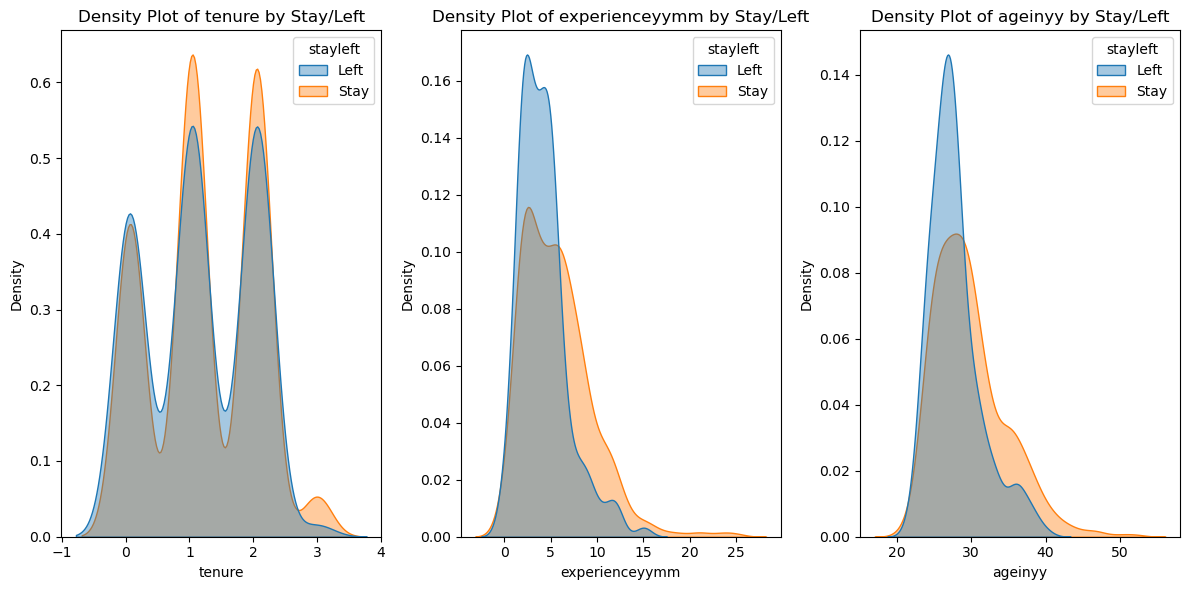

In [11]:
# Convert 'stayleft' to categorical if not already
data['stayleft'] = data['stayleft'].astype('category')

# List of continuous variables
continuous_vars = ['tenure', 'experienceyymm', 'ageinyy']

# Plot density plots
plt.figure(figsize=(12, 6))
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(1, 3, i)
    sns.kdeplot(data=data, x=var, hue="stayleft", fill=True, common_norm=False, alpha=0.4)
    plt.title(f"Density Plot of {var} by Stay/Left")
    plt.xlabel(var)
    plt.ylabel("Density")

plt.tight_layout()
plt.show()

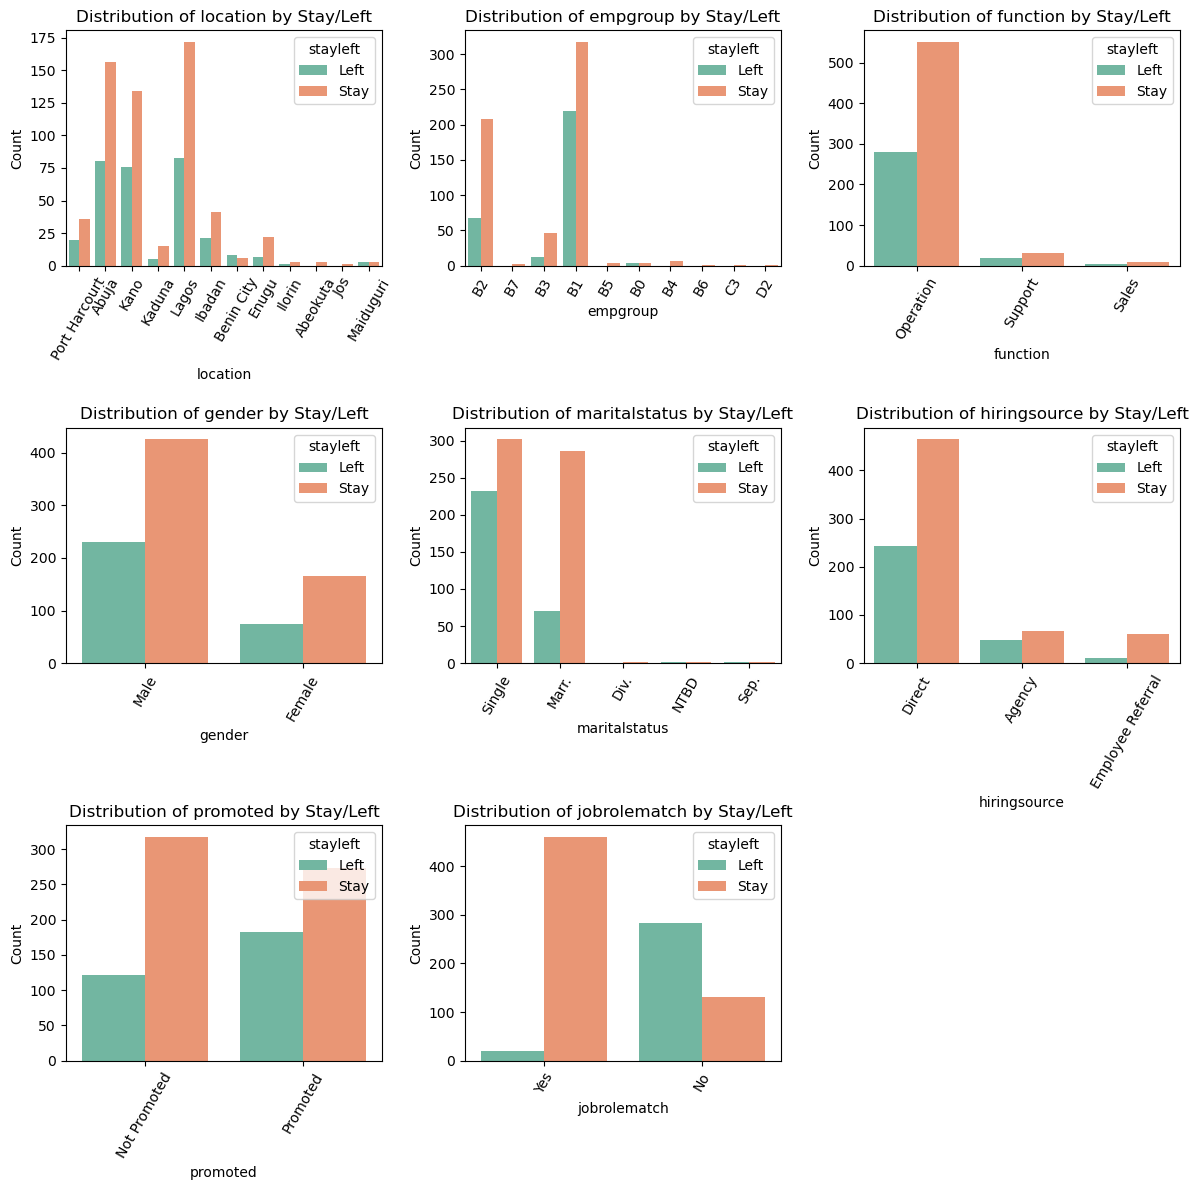

In [12]:
#Categorical variables
categorical_vars = ['location', 'empgroup', 'function', 'gender', 'maritalstatus', 
                    'hiringsource', 'promoted', 'jobrolematch']


# Plot count plots
plt.figure(figsize=(12, 12))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=data, x=var, hue="stayleft", palette="Set2")
    plt.xticks(rotation=60)
    plt.title(f"Distribution of {var} by Stay/Left")
    plt.xlabel(var)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

**Employee Characteristics**: Overall, the workforce has a mean age of around 29 years, with a range from early 20s to early 50s, and a relatively short average tenure of just over one year. Although total work experience averages about five years, it ranges widely, indicating both newcomers and highly experienced individuals. There are noticeable differences in retention across gender and marital status groups, suggesting the potential need for more tailored policies to address unique challenges faced by these demographic segments.

**Work Characteristics**: Locations exhibit varying turnover rates, hinting that local market conditions or site-specific factors may influence employee decisions to stay or leave. Employment groups such as full-time, part-time, or contractual roles show differing patterns of attrition, while functions like Operations or Sales each face distinct retention challenges. The hiring source also appears to play a role in turnover, underscoring the importance of targeted onboarding. Promotions correlate strongly with higher retention, emphasizing the value of clear career progression, and a strong match between an employee’s role and skill set is critical for long-term engagement.

#### Gender Distribution by Target Variable

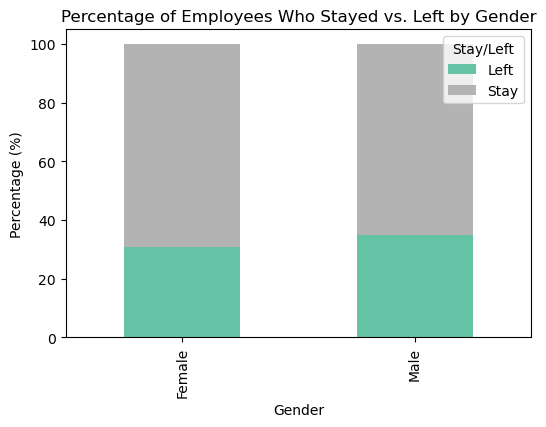

In [13]:
# Calculate percentage distribution
gender_counts = data.groupby("gender")["stayleft"].value_counts(normalize=True).unstack() * 100

# Plot stacked bar chart
gender_counts.plot(kind="bar", stacked=True, figsize=(6, 4), colormap="Set2")

# Add labels and title
plt.xlabel("Gender")
plt.ylabel("Percentage (%)")
plt.title("Percentage of Employees Who Stayed vs. Left by Gender")
plt.legend(title="Stay/Left", loc="upper right")

# Show the plot
plt.show()

### Feature Engineering

The following variables were one-hot encoded: Gender, Tenure Group, Function, Hiring Source, Marital Status, Employment Group, Job Role Match, and Promotion. One-hot encoding is a powerful feature engineering technique used to convert categorical variables into a numerical format that machine learning algorithms can effectively process. This process involves creating new binary columns for each category, where each column indicates the presence (1) or absence (0) of a particular category for a given observation. By doing so, it prevents the model from mistakenly inferring ordinal relationships between nominal data and allows algorithms like logistic regression and decision trees to more accurately interpret the data. This technique not only helps in capturing the diversity of categorical features but also improves the overall performance and interpretability of the predictive models by ensuring that each category is treated independently without bias. ​

The location variable was categorically encoded. Categorical encoding is a technique used to convert non-numeric, categorical data into a numerical format that can be easily understood and processed by machine learning algorithms. This method assigns a unique numerical value to each distinct category within the variable, thereby preserving the inherent nominal characteristics of the data without implying any ordinal relationship among the categories. Such an approach is particularly useful when dealing with features that have a natural categorization, as it simplifies the model while reducing dimensionality compared to one-hot encoding. This ensures that the predictive models can efficiently incorporate the location data, leading to more robust insights into employee attrition patterns.

#### Examining categories in Categorical columns

In [14]:
def summarize_categorical_columns(data, columns=None, print_sections=True):
    """
    Summarize value counts for all or selected categorical columns in the DataFrame.

    Parameters:
    - data: pandas DataFrame
    - columns: list of column names to summarize. If None, all object/category columns are used.
    - print_sections: if True, prints value counts for each column

    Returns:
    - A dictionary with column names as keys and their value_counts() Series as values
    """
    if columns is None:
        columns = data.select_dtypes(include=['object', 'category']).columns.tolist()

    summary_dict = {}

    for col in columns:
        counts = data[col].value_counts()
        summary_dict[col] = counts
        if print_sections:
            print(f"=== {col} Value Counts ===")
            print(counts, end="\n\n")
    
    return summary_dict

In [15]:
# Automatically detect all categorical columns and print
cat_summary = summarize_categorical_columns(data)

=== location Value Counts ===
location
Lagos            255
Abuja            236
Kano             210
Ibadan            62
Port Harcourt     56
Enugu             29
Kaduna            20
Benin City        14
Maiduguri          6
Ilorin             4
Abeokuta           3
Jos                1
Name: count, dtype: int64

=== empgroup Value Counts ===
empgroup
B1    537
B2    276
B3     59
B0      8
B4      7
B5      4
B7      2
B6      1
C3      1
D2      1
Name: count, dtype: int64

=== function Value Counts ===
function
Operation    832
Support       52
Sales         12
Name: count, dtype: int64

=== gender Value Counts ===
gender
Male      656
Female    240
Name: count, dtype: int64

=== tenuregrp Value Counts ===
tenuregrp
> 1 & < =3    626
< =1          270
Name: count, dtype: int64

=== maritalstatus Value Counts ===
maritalstatus
Single    534
Marr.     356
Div.        2
NTBD        2
Sep.        2
Name: count, dtype: int64

=== hiringsource Value Counts ===
hiringsource
Direct      

#### Reduce categories of location variable

In [16]:
# Define mapping dictionary for locations
location_priority = {
    'Lagos': 7,
    'Abuja': 6,
    'Kano': 5,
    'Ibadan': 4,
    'Port Harcourt': 3,
    'Enugu': 2,
    'other place': 1,
}

# Print original location counts and mapping
print("=== Location Value Counts ===")
print(data["location"].value_counts(), end="\n\n")

print("=== Location Mapping ===")
print(location_priority, end="\n\n")

# Map location values to priority scores
data['newlocation'] = data['location'].apply(lambda x: location_priority.get(str(x), location_priority['other place']))

=== Location Value Counts ===
location
Lagos            255
Abuja            236
Kano             210
Ibadan            62
Port Harcourt     56
Enugu             29
Kaduna            20
Benin City        14
Maiduguri          6
Ilorin             4
Abeokuta           3
Jos                1
Name: count, dtype: int64

=== Location Mapping ===
{'Lagos': 7, 'Abuja': 6, 'Kano': 5, 'Ibadan': 4, 'Port Harcourt': 3, 'Enugu': 2, 'other place': 1}



#### Encode 'Promoted' as Binary

In [17]:
# Encode 'Promoted' as 1 and others as 0
data['newpromoted'] = data['promoted'].apply(lambda x: 1 if x == 'Promoted' else 0)

#### Simplify and Map 'Marital Status'

In [18]:
# Group less frequent marital statuses under 'other status'
marital_threshold = 100
marital_counts = data['maritalstatus'].value_counts()

data['newmarital'] = data['maritalstatus'].apply(
    lambda x: x if marital_counts.get(str(x), 0) > marital_threshold else 'other status'
)

# One-hot encode new marital status
marital_dummies = pd.get_dummies(data['newmarital'], prefix='marital')

#### One-Hot Encode Function and Hiring Source

In [19]:
function_dummies = pd.get_dummies(data['function'], prefix='function')
hiring_dummies = pd.get_dummies(data['hiringsource'], prefix='hire')

#### Clean and Encode Employee Group

In [20]:
# Map known employee groups, others to 'other group'
empgroup_mapping = {'B1': 'B1', 'B2': 'B2', 'B3': 'B3'}
data['newempgroup'] = data['empgroup'].apply(lambda x: empgroup_mapping.get(str(x), 'other group'))

# One-hot encode cleaned employee group
empgroup_dummies = pd.get_dummies(data['newempgroup'], prefix='empgroup')

#### Encode Job Role Match as Binary

In [21]:
data['newjobrolematch'] = data['jobrolematch'].apply(lambda x: 1 if x == 'Yes' else 0)

#### Gender Variable

In [22]:
# Replace unknown genders with 'other'
known_genders = data['gender'].value_counts().to_dict()
data['newgender'] = data['gender'].apply(lambda x: x if x in known_genders else 'other')

# One-hot encode cleaned gender
gender_dummies = pd.get_dummies(data['newgender'], prefix='gender')

#### Encode Tenure Group

In [23]:
tenure_dummies = pd.get_dummies(data['tenuregrp'], prefix='tenure')

#### Combine All Features into Final Dataset

In [24]:
# Concatenate all one-hot encoded features with main DataFrame
dataset = pd.concat([
    data,
    hiring_dummies,
    marital_dummies,
    empgroup_dummies,
    tenure_dummies,
    function_dummies,
    gender_dummies
], axis=1)

# Preview final DataFrame
dataset.head()

,location,empgroup,function,gender,tenure,tenuregrp,experienceyymm,maritalstatus,ageinyy,hiringsource,...,empgroup_B2,empgroup_B3,empgroup_other group,tenure_< =1,tenure_> 1 & < =3,function_Operation,function_Sales,function_Support,gender_Female,gender_Male
0,Port Harcourt,B2,Operation,Male,0.00,< =1,6.080000,Single,27.120001,Direct,...,True,False,False,True,False,True,False,False,False,True
1,Abuja,B7,Support,Male,0.00,< =1,13.000000,Marr.,38.080002,Direct,...,False,False,True,True,False,False,False,True,False,True
2,Kano,B3,Operation,Male,0.01,< =1,16.049999,Marr.,36.040001,Direct,...,False,True,False,True,False,True,False,False,False,True
3,Abuja,B2,Operation,Male,0.01,< =1,6.060000,Marr.,32.070000,Direct,...,True,False,False,True,False,True,False,False,False,True
4,Kaduna,B2,Operation,Male,0.00,< =1,7.000000,Marr.,32.049999,Direct,...,True,False,False,True,False,True,False,False,False,True


In [25]:
dataset.columns

Index(['location', 'empgroup', 'function', 'gender', 'tenure', 'tenuregrp',
       'experienceyymm', 'maritalstatus', 'ageinyy', 'hiringsource',
       'promoted', 'jobrolematch', 'stayleft', 'newlocation', 'newpromoted',
       'newmarital', 'newempgroup', 'newjobrolematch', 'newgender',
       'hire_Agency', 'hire_Direct', 'hire_Employee Referral', 'marital_Marr.',
       'marital_Single', 'marital_other status', 'empgroup_B1', 'empgroup_B2',
       'empgroup_B3', 'empgroup_other group', 'tenure_< =1',
       'tenure_> 1 & < =3', 'function_Operation', 'function_Sales',
       'function_Support', 'gender_Female', 'gender_Male'],
      dtype='object')

#### Remove redundant variables

In [26]:
dataset.drop([ "maritalstatus","promoted","function","empgroup","jobrolematch","location"
              ,"hiringsource","gender", 'tenure', 'newgender', 'newmarital', 'newempgroup', 
             'tenuregrp'],axis=1,inplace=True)

## Model Selection & Training

Several machine learning models were employed to predict employee attrition:

### Logistic Regression
Logistic Regression is a binary classification model that predicts the probability of an instance belonging to a particular class (e.g., "Stayed" or "Left"). The probability is modelled using the logistic function (sigmoid function).

Logistic regression provides a probability between 0 and 1, representing the likelihood of an employee staying or leaving. It helps in estimating how various factors (features) like age, gender, or tenure influence employee attrition.

### Decision Tree
A decision tree recursively splits the data based on feature values, creating a tree-like structure where each internal node represents a feature, branches represent conditions, and leaves represent class labels (e.g., "Stayed" or "Left").

Decision trees split the dataset into smaller subsets based on the values of features. For attrition, this might include splitting employees based on their age, gender, tenure, etc. The tree structure helps in identifying which features lead to higher attrition rates, offering intuitive insights into the decision-making process.

### Random Forest
Random Forest is an ensemble learning method that builds multiple decision trees and combines their predictions. It improves upon individual decision trees by reducing overfitting and increasing prediction accuracy through averaging or voting.

Random Forest handles high-dimensional data and complex relationships better than individual decision trees. It is robust to overfitting and provides feature importance scores, which can help identify which factors (e.g., tenure, job role, promotions) are most strongly associated with attrition.

### Naive Bayes
Naive Bayes is a probabilistic classifier based on Bayes' Theorem. It assumes that all features are independent given the class label. The model calculates the probability of each class given the input features and chooses the class with the highest probability.

Naive Bayes can efficiently classify employees based on their attributes, especially when features are categorical (e.g., gender, job role, marital status). It is particularly useful for large datasets with many features. Despite its independence assumption, Naive Bayes can still perform well in predicting employee attrition when the features are not strongly correlated.

The dataset was split into 80% training data and 20% test data to ensure robust evaluation.

### Train/Test(val) split

In [27]:
y = dataset["stayleft"]
X = dataset.drop("stayleft",axis=1)

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

In [29]:
# Initialize models
lr = LogisticRegression(C=0.1, random_state=42, solver='liblinear')
dt = DecisionTreeClassifier()
rm = RandomForestClassifier()
gnb = GaussianNB()

# Prepare an empty list to store the results
results = []

# Loop through models and compute accuracies
for model, model_name in zip([lr, dt, rm, gnb], ["Logistic Regression", "Decision Tree", "Random Forest", "Naive Bayes"]):
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    
    # Append results to the list
    results.append([model_name, train_accuracy, test_accuracy])

# Create a DataFrame to display the results as a table
results_df = pd.DataFrame(results, columns=["Model", "Training Data Accuracy", "Test Data Accuracy"])

# Output the results table
print(results_df)

                 Model  Training Data Accuracy  Test Data Accuracy
0  Logistic Regression                0.888268            0.855556
1        Decision Tree                0.998603            0.877778
2        Random Forest                0.998603            0.861111
3          Naive Bayes                0.861732            0.833333


Logistic Regression performed consistently across training and test datasets, indicating good generalization. Both Decision Tree and Random Forest achieved high training accuracy, but showed slightly lower test accuracy, suggesting some overfitting. Naive Bayes had the lowest overall accuracy, though still performed reasonably well for a simple model.

## Conclusion

This machine learning project set out to develop predictive models to understand and anticipate employee attrition within an organization. 
By training and evaluating multiple classification algorithms—including Logistic Regression, Decision Tree, Random Forest, and Naive Bayes—we 
were able to compare their effectiveness in identifying employees at risk of leaving.

Among the models tested, Logistic Regression offered the most balanced performance, achieving high accuracy on both training and test data 
while maintaining good generalization. Decision Tree and Random Forest models achieved higher accuracy on the training data but showed signs 
of overfitting, which may limit their reliability in real-world applications. Naive Bayes, though less accurate, demonstrated consistent results 
and may still hold value in specific contexts where model simplicity and speed are essential.

Overall, the findings highlight the potential of machine learning to support human resource decision-making by identifying patterns linked to 
employee turnover. With further refinement and integration into organizational systems, these models can serve as valuable tools for early intervention 
and strategic workforce planning, ultimately contributing to improved employee retention and organizational stability.